<a href="https://colab.research.google.com/github/hoangson10/code/blob/main/mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kết nối google drive để đọc và lưu dữ liệu
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_image = '/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/train'
valid_image = '/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/validation'

In [ ]:
#xử lí ảnh với ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,
                                                        target_size=(200,200),class_mode='categorical')

Found 3110 images belonging to 10 classes.
Found 1100 images belonging to 10 classes.


In [ ]:
# Tạo ra dữ liệu đầu vào và đầu ra từ bộ dữ liệu training set
x_train,y_train=next(train_set)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 10)

In [ ]:
label = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue',
         'Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']

In [ ]:
#tạo mạng cnn để train mô hình
from keras import models
from keras.layers import Conv2D, MaxPooling2D
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [ ]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(10,activation='softmax'))

In [ ]:
mod.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = mod.fit(x_train,y_train,batch_size=128,epochs=200,verbose=2,validation_data=validation_set,callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

In [ ]:
model.save('mon_an.h5')

1/1 [==============================] - 0s 51ms/step
[[0.0993384  0.09418046 0.09480143 0.11108332 0.09666736 0.10116911
  0.09916411 0.10083242 0.09833076 0.10443266]]
1/1 [==============================] - 0s 45ms/step
Đây là: Bun bo Hue


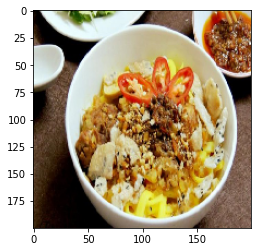

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
img=load_img('/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/test/169.jpg',target_size=(200,200,))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 50ms/step
[[0.09699645 0.09024704 0.09771732 0.11224823 0.10022137 0.10400568
  0.10030889 0.0956206  0.10181671 0.10081777]]
1/1 [==============================] - 0s 46ms/step
Đây là: Bun bo Hue


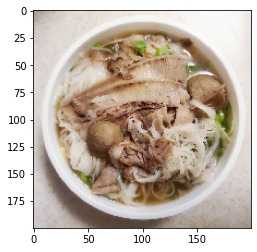

In [ ]:
img=load_img('/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/test/25.jpg',target_size=(200,200,))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])